# On this project we want to estimate the probobility of "Heart attack"

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv("C:\\Users\\admin\\ML_Project\\Heart_attack.csv")  

In [79]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [80]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# description
## At first we describe the Columns of this dataset:
- age: clearly refers to the age of patients
- sex: defines the sex of patients
- cp: defines the type of pain for chest
    - 1: Direct pain
    - 2: indirect pain with sense of pain in heart
    - 3: non heart pain
    - 4: without symptoms
- trtbps: Blood pressure in the resting mood
- chol:  Cholestrol state
fbs: High fasting blood sugar - diabetes
- restecg:ECG results at rest
    - 0: normal
    - 1: un normal st inecg
    - 2: Probably or definitely the left ventricle is bigger
- thalachh: maximum heartrate
- exng: is pain started with special activity?
- oldpeak: ST depression induced by exercise relative to rest
- slp: swallowing problems
- caa:the number of primary veins
    - 0 to 3
- thal: maximum heart rate 2
- output: probability

In [81]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [82]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [83]:
df['caa'].value_counts()

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [84]:
cdf=df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']]
msk=np.random.rand(len(cdf))<0.8
train,test=cdf[msk],cdf[~msk]

Text(0, 0.5, 'Number of patients')

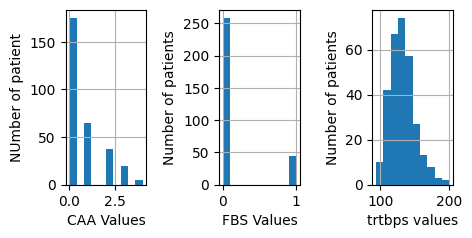

In [85]:
plt.figure(figsize=(5,5))
plt.subplot(231)
ax1=df['caa'].hist()
plt.xlabel('CAA Values')
plt.ylabel('NUmber of patient')
plt.subplot(232)
ax2=df.fbs.hist()
plt.xlabel('FBS Values')
plt.ylabel('Number of patients')
plt.subplots_adjust(wspace=0.9)  
plt.subplot(233)
ax3=df.trtbps.hist()
plt.xlabel('trtbps values')
plt.ylabel('Number of patients')

In [86]:
feature_train=train[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
x_train=np.asanyarray(feature_train)
y_train=np.asanyarray(train['output'])
#x_train[:5]
y_train[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [87]:
feature_test=test[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
x_test=np.asanyarray(feature_test)
y_test=np.asanyarray(test['output'])
y_test[:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Modeliing :  Decision tree
- On the first steo we test the DT model to see the results of calculation. we can change our model , if the precision was not good

In [102]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
clf = DecisionTreeClassifier()  
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)  
accuracy = accuracy_score(y_test, y_pred)  
print("Accuracy:", accuracy) 


Accuracy: 0.8113207547169812


# Modeling (SVM with Scikit-learn)
### The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

- Linear
- Polynomial
- Radial basis function (RBF)
- Sigmoid

# iterative Model testing
## now we will use a loop to check all types of svm to find the best results for classifier

In [95]:
def get_best_svm_clf(x_train, y_train, x_test, y_test):  

    # تعریف پارامترهایی که می‌خواهید در حلقه for اجرا کنید  
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']  
    degrees = [2, 3, 4]  
    coef0s = [0, 1, 2]  
    
    # بهترین clf را ذخیره می‌کنیم  
    best_clf = None  
    best_score = 0  
    
    # اجرای حلقه for برای تمام ترکیب‌های پارامترها  
    for kernel in kernels:  
        for degree in degrees:  
            for coef0 in coef0s:  
                clf = svm.SVC(kernel=kernel, degree=degree, coef0=coef0)  
                clf.fit(x_train, y_train)  
                score = clf.score(x_test, y_test)  
                if score > best_score:  
                    best_clf = clf  
                    best_score = score  
    
    return best_clf

In [89]:
best_clf = get_best_svm_clf(x_train, y_train, x_test, y_test)

# Evaluation
- on this step we evaluate our model by test data

In [90]:
y_hat=best_clf.predict(x_test)
y_hat[:5]
y_unique = np.unique(y_test)  
cnf_matrix = confusion_matrix(y_test, y_hat, labels=y_unique)  
np.set_printoptions(precision=2)
print (classification_report(y_test,y_hat),best_clf)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.80      0.83      0.82        24

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53
 SVC(coef0=0, degree=2, kernel='linear')


In [91]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [92]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')


Confusion matrix, without normalization
[[24  5]
 [ 4 20]]


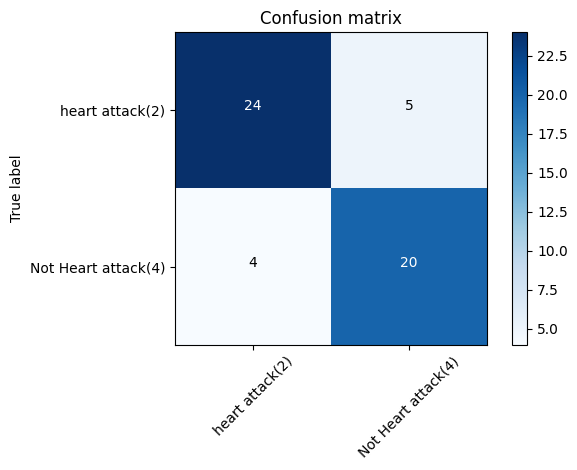

In [93]:
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['heart attack(2)','Not Heart attack(4)'],normalize= False,  title='Confusion matrix')

In [94]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_hat,pos_label=1)

0.6896551724137931